In [16]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
url = 'https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3_en.php?block_no=47626&view=1'

In [4]:
dlist = pd.io.html.read_html(url)

In [12]:
dframe = dlist[1]

In [13]:
dframe

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7,3.7 ]
1,1897,2.6,2.6,5.3,11.0,17.1,19.1,23.2,24.9,20.4,14.2,9.2,2.8,12.7
2,1898,3.1,3.6,4.7,10.8,16.1,19.2,26.2,25.8,21.1,15.3,10.2,5.6,13.5
3,1899,2.6,3.4,7.6,12.2,17.5,22.0,23.2,25.9,19.6,13.5,7.9,4.3,13.3
4,1900,1.0,2.3,5.3,11.3,17.0,19.3,22.8,25.9,22.1,15.4,10.1,4.7,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2016,4.8,6.0,9.5,15.0,20.1,22.7,25.5,27.2,24.3,18.1,10.5,7.3,15.9
121,2017,4.5,5.8,7.9,14.3,20.1,22.4,27.8,26.3,22.9,16.6,10.5,5.4,15.4
122,2018,3.7,4.5,10.8,16.4,19.8,23.1,28.9,28.3,22.6,18.7,13.3,7.2,16.4
123,2019,4.5,6.1,9.7,13.4,20.3,22.1,24.6,28.6,24.9,19.2,12.3,7.3,16.1


In [15]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    125 non-null    int64  
 1   Jan     124 non-null    float64
 2   Feb     124 non-null    float64
 3   Mar     124 non-null    object 
 4   Apr     124 non-null    float64
 5   May     124 non-null    float64
 6   Jun     124 non-null    object 
 7   Jul     123 non-null    object 
 8   Aug     123 non-null    float64
 9   Sep     123 non-null    float64
 10  Oct     123 non-null    float64
 11  Nov     123 non-null    float64
 12  Dec     124 non-null    float64
 13  Annual  125 non-null    object 
dtypes: float64(9), int64(1), object(4)
memory usage: 13.8+ KB


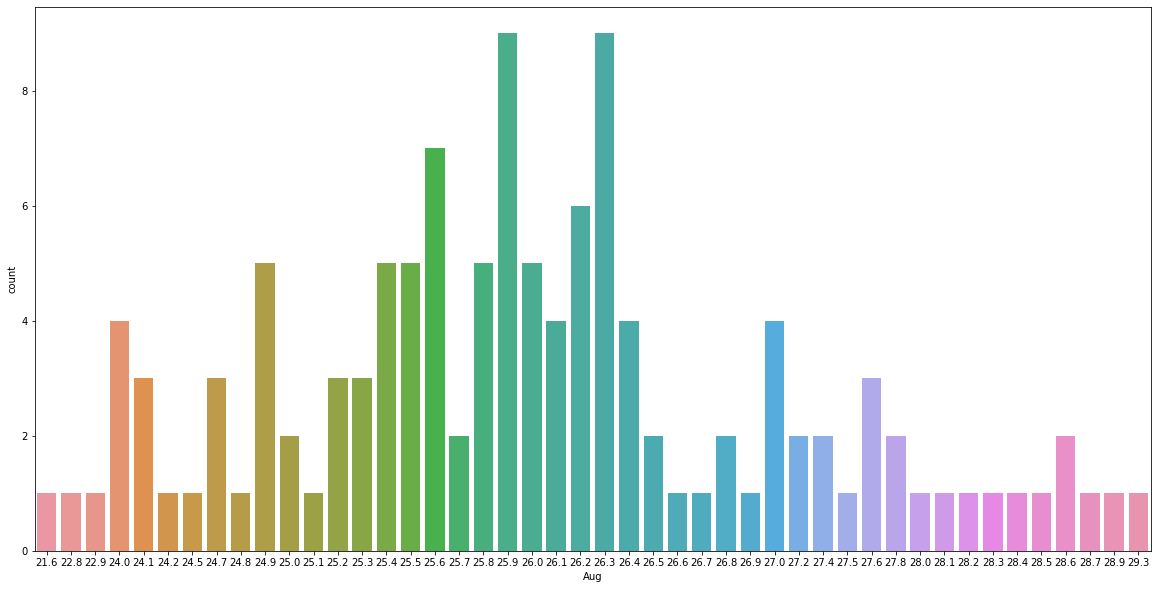

In [24]:
plt.figure(figsize=(20,10))
sns.countplot('Aug', data=dframe)

基本的な統計量を求める。

In [29]:
dframe['Aug'].mean()#平均値

26.007317073170736

In [30]:
dframe['Aug'].median()#中央値

25.9

In [34]:
dframe['Aug'].var()#標本分散

1.6226509396241502

In [32]:
dframe['Aug'].std()#標本標準偏差

1.2738331678929349

年別の8月の気温グラフ

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


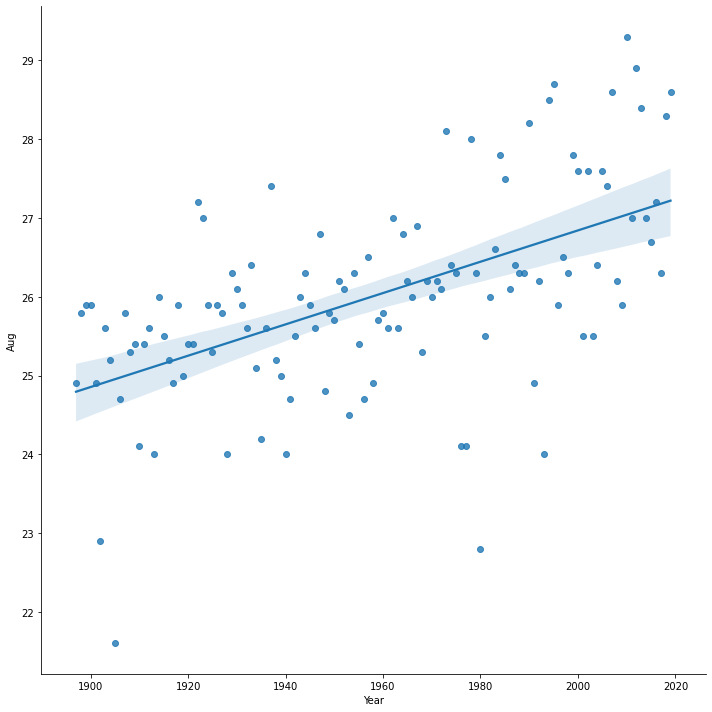

In [40]:
sns.lmplot('Year', 'Aug', dframe, size=10)

スキャッターと回帰直線のグラフから、8月の平均気温は年々増加傾向にあると言える。



---




ここからは8月の熊谷平均気温と、金沢の8月の平均気温を比較してみる。(1896〜)

In [66]:
tframe = pd.read_html('http://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=56&block_no=47605&year=1896&month=&day=&view=')
tframe = tframe[0]

In [67]:
tframe.drop(range(14))

,年,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,年の値
14,1896,2.7,2.0,4.1,12.4,15.9,21.4,23.1,25.6,20.8,15.1,9.7,3.8,13.1
15,1897,3.5,1.7,4.9,9.1,15.5,18.6,23.5,26.1,20.6,14.6,10.2,3.4,12.6
16,1898,3.6,3.3,4.1,9.8,15.9,20.0,25.2,26.4,21.6,15.9,11.2,6.1,13.6
17,1899,2.4,3.2,6.5,11.1,17.5,21.5,25.2,25.5,20.1,13.2,8.5,6.1,13.4
18,1900,1.1,2.2,5.0,11.1,16.4,19.1,22.5,26.2,21.8,15.6,10.6,5.0,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2016,5.0,4.9,8.3,14.1,19.4,22.4,26.2,27.5,23.8,18.0,11.4,7.9,15.7
135,2017,4.5,4.4,7.2,13.6,18.9,20.3,27.2,27.3,22.4,17.1,10.9,5.6,15.0
136,2018,2.8,3.0,8.7,14.1,18.4,22.4,28.3,28.2,22.6,17.8,12.9,7.3,15.5
137,2019,4.4,5.4,8.5,12.0,19.2,21.8,25.9,28.2,24.6,18.7,12.1,8.3,15.8


In [68]:
kframe = tframe.drop(range(14))

In [73]:
data1 = dframe['Aug']
data2 = kframe['8月']

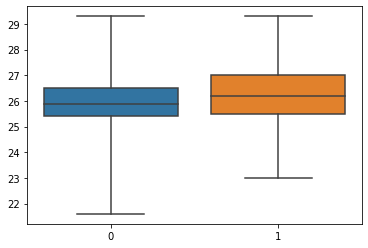

In [75]:
sns.boxplot(data=[data1, data2], whis=np.inf)

In [76]:
data2.mean()

26.275806451612894

上の図(ボックスプロット)より、金沢の方が平均気温が高いと言える。
